# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 3 </center>

# <center>Feature Engineering - Feature Selection</center>

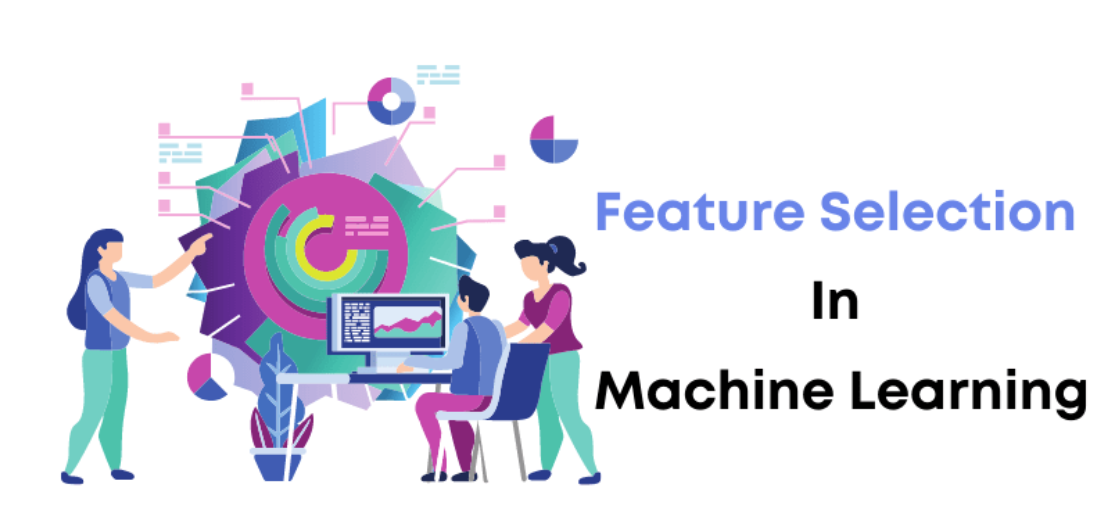

# 1. Load Boston Data


Instructions:

- Load boston data. Create DataFrame from boston data and name it as `bdf`. For this lab lets not add target column in `bdf`





In [7]:
#solution

from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

C:\Users\Lhamo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
import pandas as pd
bdf = pd.DataFrame(boston.data,columns=boston.feature_names)
# bdf['target'] = boston.target
bdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

# 2. Filter Method (Univariate Selection)

## 2.1. When both features and target are numerical

Instruction:-

- Use SelectKBest class to select k best features in boston dataset. 


- use f_regression as the score_func parameter's value.


- use get_feature_names_out() method to check selected features.


`class sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, *, k=10)`

In [6]:
#use SelectKBest class to select best best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature slection
sk = SelectKBest(score_func = f_regression,k = 5)
x_boston = sk.fit_transform(bdf,boston.target)

#apply feature selection
x_boston
#check the selected features
sk.get_feature_names_out()

array(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype=object)

## 2. When features are numerical and target it categorical

- Load Iris data for this problem.

Instruction:-

- Use SelectKBest class to select k best features in boston dataset. 


- use f_classif as the score_func parameter's value.


- use get_feature_names_out() method to check selected features.

In [17]:
#use SelectKBest class to select best best features
from sklearn.datasets import load_iris
iris = load_iris()

# from sklearn.feature_selection import f_regression
fsi = SelectKBest(k = 2)

#define feature slection, keep the default score function

x_iris = fsi.fit_transform(iris.data,iris.target)
#apply feature selection
fsi.get_feature_names_out(iris.feature_names)

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

## 2.3. When both feature and target are categorical

Instructions:

- Load data from cate.csv file.


- Use SelectKBest class to select k best features in boston dataset. 


- use chi2 as the score_func parameter's value.


- use get_feature_names_out() method to check selected features.


In [31]:
#load data here
import pandas as pd
df = pd.read_csv("cate.csv")
df


Unnamed: 0  x0_No  x0_Yes  x1_Female  x1_Male  x2_No  x2_Yes  Dependents  \
0             0    1.0     0.0        0.0      1.0    1.0     0.0         0.0   
1             1    0.0     1.0        0.0      1.0    1.0     0.0         1.0   
2             2    0.0     1.0        0.0      1.0    0.0     1.0         0.0   
3             3    0.0     1.0        0.0      1.0    1.0     0.0         0.0   
4             4    1.0     0.0        0.0      1.0    1.0     0.0         0.0   
..          ...    ...     ...        ...      ...    ...     ...         ...   
559         559    1.0     0.0        1.0      0.0    1.0     0.0         0.0   
560         560    0.0     1.0        0.0      1.0    1.0     0.0         3.0   
561         561    0.0     1.0        0.0      1.0    1.0     0.0         1.0   
562         562    0.0     1.0        0.0      1.0    1.0     0.0         2.0   
563         563    1.0     0.0        1.0      0.0    0.0     1.0         0.0   

     Education  Property_Area Loan_Status  
0          0.0            2.0           Y  
1          0.0            0.0           N  
2          0.0            2.0           Y  
3          1.0            2.0           Y  
4          0.0            2.0           Y  
..         ...            ...         ...  
559        0.0            0.0           Y  
560        0.0            0.0           Y  
561        0.0            2.0           Y  
562        0.0            2.0           Y  
563        0.0            1.0           N  

[564 rows x 11 columns]

In [9]:
#use SelectKBest class to select best best features
from sklearn.feature_selection import SelectKBest,chi2
ske = SelectKBest(score_func = chi2,k=3)

#define feature slection, keep the default score function
x_cate = ske.fit_transform(boston.data, boston.target)

#apply feature selection

ske.get_feature_names_out()


ValueError: Unknown label type: (array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19.4,
       17. , 15.6, 13.1, 41.3, 24.3, 23.3, 27. , 50. , 50. , 50. , 22.7,
       25. , 50. , 23.8, 23.8, 22.3, 17.4, 19.1, 23.1, 23.6, 22.6, 29.4,
       23.2, 24.6, 29.9, 37.2, 39.8, 36.2, 37.9, 32.5, 26.4, 29.6, 50. ,
       32. , 29.8, 34.9, 37. , 30.5, 36.4, 31.1, 29.1, 50. , 33.3, 30.3,
       34.6, 34.9, 32.9, 24.1, 42.3, 48.5, 50. , 22.6, 24.4, 22.5, 24.4,
       20. , 21.7, 19.3, 22.4, 28.1, 23.7, 25. , 23.3, 28.7, 21.5, 23. ,
       26.7, 21.7, 27.5, 30.1, 44.8, 50. , 37.6, 31.6, 46.7, 31.5, 24.3,
       31.7, 41.7, 48.3, 29. , 24. , 25.1, 31.5, 23.7, 23.3, 22. , 20.1,
       22.2, 23.7, 17.6, 18.5, 24.3, 20.5, 24.5, 26.2, 24.4, 24.8, 29.6,
       42.8, 21.9, 20.9, 44. , 50. , 36. , 30.1, 33.8, 43.1, 48.8, 31. ,
       36.5, 22.8, 30.7, 50. , 43.5, 20.7, 21.1, 25.2, 24.4, 35.2, 32.4,
       32. , 33.2, 33.1, 29.1, 35.1, 45.4, 35.4, 46. , 50. , 32.2, 22. ,
       20.1, 23.2, 22.3, 24.8, 28.5, 37.3, 27.9, 23.9, 21.7, 28.6, 27.1,
       20.3, 22.5, 29. , 24.8, 22. , 26.4, 33.1, 36.1, 28.4, 33.4, 28.2,
       22.8, 20.3, 16.1, 22.1, 19.4, 21.6, 23.8, 16.2, 17.8, 19.8, 23.1,
       21. , 23.8, 23.1, 20.4, 18.5, 25. , 24.6, 23. , 22.2, 19.3, 22.6,
       19.8, 17.1, 19.4, 22.2, 20.7, 21.1, 19.5, 18.5, 20.6, 19. , 18.7,
       32.7, 16.5, 23.9, 31.2, 17.5, 17.2, 23.1, 24.5, 26.6, 22.9, 24.1,
       18.6, 30.1, 18.2, 20.6, 17.8, 21.7, 22.7, 22.6, 25. , 19.9, 20.8,
       16.8, 21.9, 27.5, 21.9, 23.1, 50. , 50. , 50. , 50. , 50. , 13.8,
       13.8, 15. , 13.9, 13.3, 13.1, 10.2, 10.4, 10.9, 11.3, 12.3,  8.8,
        7.2, 10.5,  7.4, 10.2, 11.5, 15.1, 23.2,  9.7, 13.8, 12.7, 13.1,
       12.5,  8.5,  5. ,  6.3,  5.6,  7.2, 12.1,  8.3,  8.5,  5. , 11.9,
       27.9, 17.2, 27.5, 15. , 17.2, 17.9, 16.3,  7. ,  7.2,  7.5, 10.4,
        8.8,  8.4, 16.7, 14.2, 20.8, 13.4, 11.7,  8.3, 10.2, 10.9, 11. ,
        9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4,  9.6,  8.7,  8.4, 12.8,
       10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1, 13. , 13.4,
       15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20. , 16.4, 17.7,
       19.5, 20.2, 21.4, 19.9, 19. , 19.1, 19.1, 20.1, 19.9, 19.6, 23.2,
       29.8, 13.8, 13.3, 16.7, 12. , 14.6, 21.4, 23. , 23.7, 25. , 21.8,
       20.6, 21.2, 19.1, 20.6, 15.2,  7. ,  8.1, 13.6, 20.1, 21.8, 24.5,
       23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22. , 11.9]),)

# 3. Wrapper Method

## 3.1. Forward Selection


Instructions:-

- Use same boston data to perform feature selection using Wrapper Method.



- Use SequentialFeatureSelector class to apply forward selection techniques.


- Verify selected features


`class sklearn.feature_selection.SequentialFeatureSelector(estimator, *, n_features_to_select='warn', tol=None, direction='forward', scoring=None, cv=5, n_jobs=None)`



In [20]:
#import SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

#create estimator or model
lr =LinearRegression()

#create SequentialFeatureSelector object provide estimator, number of feature to 
#select and feature selection technique to use
ffs = SequentialFeatureSelector(lr,n_features_to_select = 5)


#call fit_transform method to fit teh data and perform feature selection
x_selected_boston = ffs.fit_transform(bdf,boston.target)


#Check selected columns
x_selected_boston

array([[6.3200e-03, 0.0000e+00, 6.5750e+00, 1.5300e+01, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 6.4210e+00, 1.7800e+01, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.1850e+00, 1.7800e+01, 4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 6.9760e+00, 2.1000e+01, 5.6400e+00],
       [1.0959e-01, 0.0000e+00, 6.7940e+00, 2.1000e+01, 6.4800e+00],
       [4.7410e-02, 0.0000e+00, 6.0300e+00, 2.1000e+01, 7.8800e+00]])

In [21]:
ffs.get_feature_names_out()

array(['CRIM', 'CHAS', 'RM', 'PTRATIO', 'LSTAT'], dtype=object)

## 3.1. Backward Selection

Instructions:-

- Use same boston data to perform feature selection using Wrapper Method.



- Use SequentialFeatureSelector class to apply backward elimination techniques.


- Verify the selected features


`class sklearn.feature_selection.SequentialFeatureSelector(estimator, *, n_features_to_select='warn', tol=None, direction='forward', scoring=None, cv=5, n_jobs=None)`



In [29]:
#import SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

#create estimator or model
bs = LinearRegression()
#create SequentialFeatureSelector object provide estimator, number of feature to 
#select and feature selection technique to use
fbs = SequentialFeatureSelector(bs,n_features_to_select = 5,direction = 'backward')
1

#call fit_transform method to fit teh data and perform feature selection
x_select_boston = fbs.fit_transform(bdf,boston.target)


#Check selected columns
x_select_boston

array([[ 0.538 ,  4.09  ,  1.    , 15.3   ,  4.98  ],
       [ 0.469 ,  4.9671,  2.    , 17.8   ,  9.14  ],
       [ 0.469 ,  4.9671,  2.    , 17.8   ,  4.03  ],
       ...,
       [ 0.573 ,  2.1675,  1.    , 21.    ,  5.64  ],
       [ 0.573 ,  2.3889,  1.    , 21.    ,  6.48  ],
       [ 0.573 ,  2.505 ,  1.    , 21.    ,  7.88  ]])

In [30]:
fbs.get_feature_names_out()

array(['NOX', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype=object)